# Pose Lab

In this lab, we will get practice working with the `Pose` class in PyRosetta. We will load in a protein from a PDB files, use the `Pose` class to learn about the geometry of the protein, make changes to this geometry, and visualize the changes easily with `PyMOL` and PyRosetta's `PyMOLMover`. 

On the attached cheatsheet you will find various useful commands to interrogate poses; these may come in handy for the exercises.

**PyRosetta Installation:**
The following two lines will load in the PyRosetta library and load in database files. If this does not work, you may have to revisit your PyRosetta installation.

In [1]:
from pyrosetta import *
init()

PyRosetta-4 2020 [Rosetta PyRosetta4.conda.mac.python37.Release 2020.02+release.22ef835b4a2647af94fcd6421a85720f07eddf12 2020-01-05T17:31:56] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: {0} Checking for fconfig files in pwd and ./rosetta/flags
core.init: {0} Rosetta version: PyRosetta4.conda.mac.python37.Release r242 2020.02+release.22ef835b4a2 22ef835b4a2647af94fcd6421a85720f07eddf12 http://www.pyrosetta.org 2020-01-05T17:31:56
core.init: {0} command: PyRosetta -ex1 -ex2aro -database /Users/paul/anaconda3/envs/pyrosetta_env/lib/python3.7/site-packages/pyrosetta/database
basic.random.init_random_generator: {0} 'RNG device' seed mode, using '/dev/urandom', seed=1747986707 seed_offset=0 real_seed=1747986707 thread_index=0
basic.random.init_random_generator: {0} RandomGenerator:init: Normal mode, seed=1747986707 RG_type=mt19937


## Loading in a PDB File ##

We will spend some time today looking at the crystal structure for the protein **PafA** (PDB ID: 5tj3) using Pyrosetta and PyMOL. PafA is an alkaline phosphatase, which removes a phosphate group from a phosphate monoester. In this structure, a modified amino acid, phosphothreonine, is used to mimic the substrate in the active site. Let's load in this structure with PyRosetta:

In [2]:
pose = pose_from_pdb("5tj3.pdb")

core.chemical.GlobalResidueTypeSet: {0} Finished initializing fa_standard residue type set.  Created 980 residue types
core.chemical.GlobalResidueTypeSet: {0} Total time to initialize 0.975732 seconds.
core.import_pose.import_pose: {0} File '5tj3.pdb' automatically determined to be of type PDB
core.conformation.Conformation: {0} [ WARNING ] missing heavyatom:  CG  on residue LYS 233
core.conformation.Conformation: {0} [ WARNING ] missing heavyatom:  CD  on residue LYS 233
core.conformation.Conformation: {0} [ WARNING ] missing heavyatom:  CE  on residue LYS 233
core.conformation.Conformation: {0} [ WARNING ] missing heavyatom:  NZ  on residue LYS 233
core.conformation.Conformation: {0} [ WARNING ] missing heavyatom:  CG  on residue ASP 350
core.conformation.Conformation: {0} [ WARNING ] missing heavyatom:  OD1 on residue ASP 350
core.conformation.Conformation: {0} [ WARNING ] missing heavyatom:  OD2 on residue ASP 350
core.conformation.Conformation: {0} [ WARNING ] missing heavyatom:  

basic.random.init_random_generator: {2} 'RNG device' seed mode, using '/dev/urandom', seed=1506755719 seed_offset=0 real_seed=1506755721 thread_index=2
basic.random.init_random_generator: {2} RandomGenerator:init: Normal mode, seed=1506755721 RG_type=mt19937
basic.random.init_random_generator: {4} 'RNG device' seed mode, using '/dev/urandom', seed=-424132909 seed_offset=0 real_seed=-424132905 thread_index=4
basic.random.init_random_generator: {4} RandomGenerator:init: Normal mode, seed=-424132905 RG_type=mt19937
basic.thread_manager.RosettaThreadManager: {2} Thread 2 completed 5 of 14 work units.
basic.thread_manager.RosettaThreadManager: {3} Thread 3 completed 3 of 14 work units.
basic.random.init_random_generator: {6} 'RNG device' seed mode, using '/dev/urandom', seed=1020875076 seed_offset=0 real_seed=1020875082 thread_index=6
basic.random.init_random_generator: {5} 'RNG device' seed mode, using '/dev/urandom', seed=-1967010703 seed_offset=0 real_seed=-1967010698 thread_index=5
basi

In [3]:
!grep "^ATOM" 5tj3.pdb | head -n 10

ATOM      1  N   ASN A  24      25.188 -20.017  58.979  1.00 36.24           N  
ATOM      2  CA  ASN A  24      25.350 -19.016  57.930  1.00 34.85           C  
ATOM      3  C   ASN A  24      24.773 -19.505  56.606  1.00 30.92           C  
ATOM      4  O   ASN A  24      25.214 -19.083  55.540  1.00 30.95           O  
ATOM      5  CB  ASN A  24      26.827 -18.654  57.751  1.00 36.14           C  
ATOM      6  CG  ASN A  24      27.408 -17.948  58.961  1.00 37.74           C  
ATOM      7  OD1 ASN A  24      26.691 -17.298  59.722  1.00 39.62           O  
ATOM      8  ND2 ASN A  24      28.719 -18.068  59.141  1.00 36.26           N  
ATOM      9  N   ALA A  25      23.788 -20.392  56.674  1.00 26.11           N  
ATOM     10  CA  ALA A  25      23.162 -20.941  55.482  1.00 23.29           C  


We can take a look at the sequence with the following command.

In [4]:
pose.sequence()

'NAVPRPKLVVGLVVDQMRWDYLYRYYSKYGEGGFKRMLNTGYSLNNVHIDYVPTVTAIGHTSIFTGSVPSIHGIAGNDWYDKELGKSVYCTSDETVQPVGTTSNSVGQHSPRNLWSTTVTDQLGLATNFTSKVVGVSLKDRASILPAGHNPTGAFWFDDTTGKFITSTYYTKELPKWVNDFNNKNVPAQLVANGWNTLLPINQYTESSEDNVEWEGLLGSKKTPTFPYTDLAKDYEAKKGLIRTTPFGNTLTLQMADAAIDGNQMGVDDITDFLTVNLASTDYVGHNFGPNSIEVEDTYLRLDRDLADFFNNLDKKVGKGNYLVFLSADHGAAHSVGFMQAHKMPTGFFDMKKEMNAKLKQKFGADNIIAAAMNYQVYFDRKVLADSKLELDDVRDYVMTELKKEPSVLYVLSTDEIWESSIPEPIKSRVINGYNWKRSGDIQIISKDGYLSAYSKKGTTHSVWNSYDSHIPLLFMGWGIKQGESNQPYHMTDIAPTVSSLLKIQFPSGAVGKPITEVIGZZZZ'

Sometimes PDB files do not conform to standards and need to be cleaned to be loaded successfully with PyRosetta. One way to make sure the file is loaded successfully is to only ATOM lines from the PDB file. Alternatively, you could use the cleanATOM function in pyrosetta.toolbox to achieve the same: 

In [5]:
from pyrosetta.toolbox import cleanATOM
cleanATOM("5tj3.pdb")

In [6]:
pose_clean = pose_from_pdb("5tj3.clean.pdb")

core.import_pose.import_pose: {0} File '5tj3.clean.pdb' automatically determined to be of type PDB
core.conformation.Conformation: {0} [ WARNING ] missing heavyatom:  CG  on residue LYS 232
core.conformation.Conformation: {0} [ WARNING ] missing heavyatom:  CD  on residue LYS 232
core.conformation.Conformation: {0} [ WARNING ] missing heavyatom:  CE  on residue LYS 232
core.conformation.Conformation: {0} [ WARNING ] missing heavyatom:  NZ  on residue LYS 232
core.conformation.Conformation: {0} [ WARNING ] missing heavyatom:  CG  on residue ASP 349
core.conformation.Conformation: {0} [ WARNING ] missing heavyatom:  OD1 on residue ASP 349
core.conformation.Conformation: {0} [ WARNING ] missing heavyatom:  OD2 on residue ASP 349
core.conformation.Conformation: {0} [ WARNING ] missing heavyatom:  CG  on residue LYS 352
core.conformation.Conformation: {0} [ WARNING ] missing heavyatom:  CD  on residue LYS 352
core.conformation.Conformation: {0} [ WARNING ] missing heavyatom:  CE  on residue

In our case, we could load in the PDB file for 5tj3 without cleaning it. In fact, we've lost some residues when cleaning the PDB file with cleanATOM. What is the difference in the sequence of the pose now, compared to before?

In [7]:
pose_clean.sequence()

'NAVPRPKLVVGLVVDQMRWDYLYRYYSKYGEGGFKRMLNTGYSLNNVHIDYVPTVAIGHTSIFTGSVPSIHGIAGNDWYDKELGKSVYCTSDETVQPVGTTSNSVGQHSPRNLWSTTVTDQLGLATNFTSKVVGVSLKDRASILPAGHNPTGAFWFDDTTGKFITSTYYTKELPKWVNDFNNKNVPAQLVANGWNTLLPINQYTESSEDNVEWEGLLGSKKTPTFPYTDLAKDYEAKKGLIRTTPFGNTLTLQMADAAIDGNQMGVDDITDFLTVNLASTDYVGHNFGPNSIEVEDTYLRLDRDLADFFNNLDKKVGKGNYLVFLSADHGAAHSVGFMQAHKMPTGFFDMKKEMNAKLKQKFGADNIIAAAMNYQVYFDRKVLADSKLELDDVRDYVMTELKKEPSVLYVLSTDEIWESSIPEPIKSRVINGYNWKRSGDIQIISKDGYLSAYSKKGTTHSVWNSYDSHIPLLFMGWGIKQGESNQPYHMTDIAPTVSSLLKIQFPSGAVGKPITEVIG'

Write code below to find the difference(s) between the pose_clean.sequence() and pose.sequence():

In [8]:
### BEGIN SOLUTION

# This doesn't do a good job of illustrating where things
# differ between these two sequences. The question is dangerously
# close to "solve the problem of optimal sequence alignment"
# which is a fair question to ask a graduate student in
# bioinformatics on their take-home qualifying exam, but perhaps,
# not a great question to ask undergraduates who only have an
# hour!
pcseq = pose_clean.sequence()
pseq = pose.sequence()
for i in range(min(len(pcseq),len(pseq))):
    if pcseq[i] != pseq[i]:
        print(i, pcseq[i], pseq[i])
if len(pcseq)>len(pseq):
    print("pcseq end: ", pcseq[len(pseq):])
elif len(pseq) > len(pcseq):
    print("pseq end: ", pseq[len(pcseq):])
    
### END SOLUTION

55 A T
56 I A
57 G I
58 H G
59 T H
60 S T
61 I S
62 F I
63 T F
64 G T
65 S G
66 V S
67 P V
68 S P
69 I S
70 H I
71 G H
72 I G
73 A I
74 G A
75 N G
76 D N
77 W D
78 Y W
79 D Y
80 K D
81 E K
82 L E
83 G L
84 K G
85 S K
86 V S
87 Y V
88 C Y
89 T C
90 S T
91 D S
92 E D
93 T E
94 V T
95 Q V
96 P Q
97 V P
98 G V
99 T G
101 S T
102 N S
103 S N
104 V S
105 G V
106 Q G
107 H Q
108 S H
109 P S
110 R P
111 N R
112 L N
113 W L
114 S W
115 T S
117 V T
118 T V
119 D T
120 Q D
121 L Q
122 G L
123 L G
124 A L
125 T A
126 N T
127 F N
128 T F
129 S T
130 K S
131 V K
133 G V
134 V G
135 S V
136 L S
137 K L
138 D K
139 R D
140 A R
141 S A
142 I S
143 L I
144 P L
145 A P
146 G A
147 H G
148 N H
149 P N
150 T P
151 G T
152 A G
153 F A
154 W F
155 F W
156 D F
158 T D
160 G T
161 K G
162 F K
163 I F
164 T I
165 S T
166 T S
167 Y T
169 T Y
170 K T
171 E K
172 L E
173 P L
174 K P
175 W K
176 V W
177 N V
178 D N
179 F D
180 N F
182 K N
183 N K
184 V N
185 P V
186 A P
187 Q A
188 L Q
189 V L
190 A V
191 N A
192 G

With the function annotated_sequence below, we can start to see in more detail what the differences are. Note that non-canonical amino acids and hetatms are spelled out more explicitly now.

In [9]:
pose.annotated_sequence()

'N[ASN:NtermProteinFull]AVPRPKLVVGLVVDQMRWDYLYRYYSKYGEGGFKRMLNTGYSLNNVHIDYVPTVT[THR:phosphorylated]AIGHTSIFTGSVPSIHGIAGNDWYDKELGKSVYCTSDETVQPVGTTSNSVGQHSPRNLWSTTVTDQLGLATNFTSKVVGVSLKDRASILPAGHNPTGAFWFDDTTGKFITSTYYTKELPKWVNDFNNKNVPAQLVANGWNTLLPINQYTESSEDNVEWEGLLGSKKTPTFPYTDLAKDYEAKKGLIRTTPFGNTLTLQMADAAIDGNQMGVDDITDFLTVNLASTDYVGHNFGPNSIEVEDTYLRLDRDLADFFNNLDKKVGKGNYLVFLSADHGAAHSVGFMQAHKMPTGFFDMKKEMNAKLKQKFGADNIIAAAMNYQVYFDRKVLADSKLELDDVRDYVMTELKKEPSVLYVLSTDEIWESSIPEPIKSRVINGYNWKRSGDIQIISKDGYLSAYSKKGTTHSVWNSYDSHIPLLFMGWGIKQGESNQPYHMTDIAPTVSSLLKIQFPSGAVGKPITEVIG[GLY:CtermProteinFull]Z[ZN]Z[ZN]Z[ZN]Z[ZN]'

In [10]:
pose_clean.annotated_sequence()

'N[ASN:NtermProteinFull]AVPRPKLVVGLVVDQMRWDYLYRYYSKYGEGGFKRMLNTGYSLNNVHIDYVPTVAIGHTSIFTGSVPSIHGIAGNDWYDKELGKSVYCTSDETVQPVGTTSNSVGQHSPRNLWSTTVTDQLGLATNFTSKVVGVSLKDRASILPAGHNPTGAFWFDDTTGKFITSTYYTKELPKWVNDFNNKNVPAQLVANGWNTLLPINQYTESSEDNVEWEGLLGSKKTPTFPYTDLAKDYEAKKGLIRTTPFGNTLTLQMADAAIDGNQMGVDDITDFLTVNLASTDYVGHNFGPNSIEVEDTYLRLDRDLADFFNNLDKKVGKGNYLVFLSADHGAAHSVGFMQAHKMPTGFFDMKKEMNAKLKQKFGADNIIAAAMNYQVYFDRKVLADSKLELDDVRDYVMTELKKEPSVLYVLSTDEIWESSIPEPIKSRVINGYNWKRSGDIQIISKDGYLSAYSKKGTTHSVWNSYDSHIPLLFMGWGIKQGESNQPYHMTDIAPTVSSLLKIQFPSGAVGKPITEVIG[GLY:CtermProteinFull]'

Because this PDB file was able to load into PyRosetta successfully without the cleanATOM method, we're going to stick with this slightly larger `pose` through the rest of this lab.

## Working with Pose residues ##

   We can use methods in `Pose` to count residues and pick out residues from the pose. Remember that `Pose` is a python class, and to access methods it implements, you need an instance of the class (here `pose` or `pose_clean`) and you then use a dot after the instance. Here's a couple examples.

In [11]:
print(pose.total_residue())
print(pose_clean.total_residue())
# Did you catch all the missing residues before?

524
519


In [12]:
res = pose.residue(24)
print(res.name())

ARG


What is the 24th residue of the protein pose? What is the 24th residue in the PDB file (look in the PDB file)?

We can immediately see that the numbering Pyrosetta internally uses for pose residues is different from the PDB file. The information corresponding to the PDB file can be accessed through the `pose.pdb_info()` object.

In [13]:
print(pose.pdb_info().chain(24))
print(pose.pdb_info().number(24))

A
47


In [14]:
print(pose.pdb_info().pose2pdb(24))

47 A 


In [15]:
print(pose.pdb_info().pdb2pose('A', 24))

1


Note that Rosetta counts from 1. Lots of programming languages encourage developers to count from 0, including python. This will come up any time you try to use the `range` function in a for loop. If you write:
```
    for i in range(4):
        print(i)
```
then it will output numbers 0, 1, 2, and 3. In order to iterate from 1 to 4, you have to write:
```
    for i in range(1,4+1):
        print(i)
```
which is ever so slightly annoying. If you want to iterate over all of the residues in a Pose, you will need to construct your range like this:
```
    for i in range(1,pose.total_residue()+1):
        # whatever you were going to do
        pass
```
You will use this for-loop construct in this lab.

===

Now we can see how to examine the identity of a residue by PDB chain and residue number.

Once we get a residue, there are various methods in the `Residue` class that might let us read useful information about a residue. We can get instances of the `Residue` class from `Pose`. For instance, we can do the following:

In [16]:
res_24 = pose.residue(24)
print(res_24.name())
print(res_24.is_charged())

ARG
True


## Accessing PyRosetta Documentation ##

One benefit of working within Jupyter notebooks is that we can make use of its autocomplete features. To see an example, try typing `res.is_` and pressing `tab` to find other features of residues you can examine. Note that you can scroll down to see more features.

In [17]:
#res.is_

Some atom-level information is described by funtions starting with `atom_is_`. Press tab to find these functions


In [18]:
#res.atom_is_

You will be using this feature *extensively* this week. Lots of problems give you too little information to figure out the answer: the point of these questions will be to get you to dig through class methods to find the ones that are appropriate.

It is worth noting that the autocomplete feature doesn't work well for function results. You have to store the results in a variable in one cell, evaluate that cell, and then you can autocomplete in the next cell. What do I mean?

Well, we ran
```
    res = pose.residue(24)
```
and then followed it with
```
    res.is_<tab>
```
It would have been nice if we could have just typed:
```
    pose.residue(24).is_<tab>
```
without first assigning the result of the `pose.residue(24)` function call to a variable. Sadly, it doesn't work that way.



There is additional information available about a residue's chemistry that is stored in the `ResidueType` for a the `Residue`. Every `Residue` represents a concrete representative of a more abstract `ResidueType`. A `ResidueType` holds general information about the chemistry of a group of atoms: how many atoms there are and their names, what bonds are present, the element for each atom. `Residue` holds the concrete information about a particular instance, including its coordinates and the information about how it is chemically bound to other `Residue`s in the structure. Under the hood, many of the functions you see in `Residue` simply defer to `ResidueType` to provide the data that you're looking for. 

To get the `ResidueType` for a `Residue`, use the `type()` method:

In [19]:
restype = res.type()

Similarly, we can get the atom type for a particular atom

In [20]:
Otype = restype.atom_type(restype.atom_index("O"))

Now let's look at the methods for thh `AtomType` class using the tab key

In [21]:
#Otype.

Now that we've looked through several functions, we know how to confirm that PyRosetta has loaded in the zinc ions as metal ions. 

In [22]:
zn_resid = pose.pdb_info().pdb2pose('A', 601)
res_zn = pose.residue(zn_resid) 
res_zn.is_metal() 

True

We can also explore documentation for objects and methods from Jupyter notebooks. Say you wanted to find out more about the Pose object. Try typing in `Pose?`, `?Pose` or `help(Pose)`.

In [23]:
Pose?

By the way, now if you ever go on to develop some PyRosetta functions, you can see the importance of docstrings!

This works for PyRosetta methods as well:

In [24]:
res_24 = pose.residue(24)
res_24.atom_index?

Now use the method below to find out whether the "CA" atom in res_24 is a backbone atom. 

In [25]:
### BEGIN SOLUTION
res_24.atom_is_backbone(res_24.atom_index("CA"))
### END SOLUTION

True

## Getting spatial features from a Pose ## 

`Pose` objects make it easy to access angles, distances, and torsions for analysis. Lets take a look at how to get backbone torsions first.

In [26]:
resid = pose.pdb_info().pdb2pose('A', 28)
print(pose.phi(resid))
print(pose.psi(resid))
print(pose.chi(1, resid))

-149.17513487055064
151.30037995499168
-82.850785668982


Say we want to find the length of the $N$-$C_\alpha$ and $C_\alpha$-$C$ bonds for residue A:28 from the PDB file. We can use a couple of approaches. The first involves using the bond length in the `Conformation` class, which stores some info on protein geometry. Take a look at some of the methods in the `Conformation` class using tab completion.

In [27]:
conformation = pose.conformation()

Look at the documentation for the method `conformation.bond_length` below.

In [28]:
conformation.bond_length?

To use the bond_length method in the `Conformation` class, it looks like we'll need to make `AtomID` objects. We can do this using an atom index and residue ID as follows:

In [29]:
res_28 = pose.residue(resid)
N28 = AtomID(res_28.atom_index("N"), resid)
CA28 = AtomID(res_28.atom_index("CA"), resid)
C28 = AtomID(res_28.atom_index("C"), resid)

As usual, if you did not know how to construct an `AtomID`, you could check the documentation using `?AtomID`.

Now we can compute the bond lengths:

In [30]:
print(pose.conformation().bond_length(N28, CA28))
print(pose.conformation().bond_length(CA28, C28))

1.456100614655453
1.5184027792387658


Alternatively, we can compute bond lengths ourselves starting from the xyz coordinates of the atoms. 

The method `xyz` of `Residue` returns a `Vector` class. The `Vector` class has various useful builtin methods including computing dot products, cross products, and norms. Through operator overloading in the `Vector` class, you can just subtract and add vector objects and they will manipulate the corresponding vectors appropriately.

In [31]:
N_xyz = res_28.xyz("N")
CA_xyz = res_28.xyz("CA")
C_xyz = res_28.xyz("C")
print((CA_xyz - N_xyz).norm())
print((CA_xyz - C_xyz).norm())

1.456100614655453
1.5184027792387658


Thankfully, the two approaches for computing distances check out!

**Note**: Not all bond lengths, angles, and torsions will be accessible using the `Conformation` object. That is because the `Conformation` object stores only the subset it needs to generate xyz locations for the atoms in the pose. The most stable way to get this information is to compute it using the xyz Cartesian coordinate vectors as a starting point.

Let's take a look at Rosetta's ideal values for this amino acid's bond lengths and see how these values compare. First find Pyrosetta's database directory on your computer (hint: it should have shown up when you ran `init()` at the beginning of this Jupyter notebook.) Head to the subdirectory `chemical/residue_type_sets/fa_standard/` to find the residue you're looking at. Residue `A:28` can be found in the `l-caa` folder, since it is a standard amino acid. The `ICOOR_INTERNAL` lines will provide torsion angles, (improper) bond angles, and bond lengths between subsequent atoms in this residue. From this you should be able to deduce Rosetta's ideal $N$-$C_\alpha$ and $C_\alpha$-$C$ bond lengths.

These ideal values would for instance be used if we generated a new pose from an amino acid sequence. In fact, let's try that here:

In [32]:
tiny_seq = res_28.name1()
pose_tiny = pose_from_sequence(tiny_seq)
print(pose_tiny.sequence())

R


In [33]:
N_xyz = pose_tiny.residue(1).xyz("N")
CA_xyz = pose_tiny.residue(1).xyz("CA")
C_xyz = pose_tiny.residue(1).xyz("C")
print((CA_xyz - N_xyz).norm())
print((CA_xyz - C_xyz).norm())

1.458001
1.5232569999999999


Efficiency Tip:

When you are computing the distance between two points, you use
\begin{equation}
    dist = \sqrt{ (x_1-x_2)^2 + (y_1-y_2)^2 + (z_1-z_2)^2 }
\end{equation}
which requires the somwhat slow evaluation of a square root. If you are computing the distance between two points to learn whether or not they are closer than some threshold, $\tau$, you can actually avoid that square root.

\begin{align}
    \sqrt{ (x_1-x_2)^2 + (y_1-y_2)^2 + (z_1-z_2)^2 }     <= \tau     \tag{1} \\
    \sqrt{ (x_1-x_2)^2 + (y_1-y_2)^2 + (z_1-z_2)^2 } ^ 2 <= \tau ^ 2 \tag{2} \\
           (x_1-x_2)^2 + (y_1-y_2)^2 + (z_1-z_2)^2       <= \tau ^ 2 \tag{3} \\
\end{align}

The inequality holds when you square both sides in Eqn 2. So instead of comparing a distance to a threshold distance, compare a square distance against a squared threshold distance. Squaring a distance is fast; squarerooting a squared distance is slow. Use square distances instead of distances when you can.

(That said: you're using *python*, even if the distance functions themselves are written in C++. The overhead of calling the C++ function from python dwarfs the cost of a square root. If you're using vector operations in numpy, then the sqrt can make a difference, but if you're writing python for loops to iterate over atom pairs, you're already spending vastly more time in the python layer than you are down in the actual calculations.)

===

Now lets figure out how to get angles in the protein. If the `Conformation` class has the angle we're looking for, we can use the AtomID objects we've already created:

In [34]:
angle = pose.conformation().bond_angle(N28, CA28, C28)
print(angle)


1.913188766577386


We can compute the above angle in degrees:

In [35]:
import math
angle*180/math.pi

109.61764173672383

Note how this compares to the expected angle based on a tetrahedral geometry for the $C_\alpha$ carbon.

**Problem:** Try to calculate this angle using the xyz atom positions for N, CA, and C of residue A:28 in the protein. You can use the `Vector` function `v3 = v1.dot(v2)` along with `v1.norm()`. The vector angle between two vectors BA and BC is $arccos(\frac{BA \cdot BC}{|BA| |BC|})$.

In [36]:
### BEGIN SOLUTION

N_xyz = res_28.xyz("N")
CA_xyz = res_28.xyz("CA")
C_xyz = res_28.xyz("C")

N_CA = N_xyz - CA_xyz
C_CA = C_xyz - CA_xyz
norm_N_CA = N_CA.length()
norm_C_CA = C_CA.length()
math.acos((N_CA.dot(C_CA))/(norm_N_CA*norm_C_CA))

### END SOLUTION

1.913188766577386

## Pose Scoring

The `Pose` class not only contains information about pose geometry, but also contains information about the energy, or score, of the conformation. The energy stored in a Pose object reflects the last time it was scored.

Below, we show how to get Rosetta's default score function (which has the weights of different types of energy terms already set). Then we score a pose, which will update its energy values. We can see the energy function used along with the score in Rosetta Energy Units.

In [37]:
sf = get_fa_scorefxn()
sf(pose)

core.scoring.ScoreFunctionFactory: {0} SCOREFUNCTION: ref2015


-538.7690318782074

The `Pose` object can then be the gateway to all sorts of useful energy information. Here we're printing out a pretty cryptic set of energy information for the 5th residue in the protein.

In [38]:
energy = pose.energies()
print(energy.residue_total_energies(5))

( fa_atr; -6.77693) ( fa_rep; 1.02435) ( fa_sol; 4.3255) ( fa_intra_atr; -1.74456) ( fa_intra_rep; 2.53725) ( fa_intra_sol; 1.05863) ( fa_intra_atr_xover4; -0.430578) ( fa_intra_rep_xover4; 0.157688) ( fa_intra_sol_xover4; 0.197035) ( fa_intra_atr_nonprotein; 0) ( fa_intra_rep_nonprotein; 0) ( fa_intra_sol_nonprotein; 0) ( fa_intra_RNA_base_phos_atr; 0) ( fa_intra_RNA_base_phos_rep; 0) ( fa_intra_RNA_base_phos_sol; 0) ( fa_atr_dummy; 0) ( fa_rep_dummy; 0) ( fa_sol_dummy; 0) ( fa_vdw_tinker; 0) ( lk_hack; 0) ( lk_ball; 0) ( lk_ball_wtd; -0.117032) ( lk_ball_iso; 0) ( lk_ball_bridge; 0) ( lk_ball_bridge_uncpl; 0) ( coarse_fa_atr; 0) ( coarse_fa_rep; 0) ( coarse_fa_sol; 0) ( coarse_beadlj; 0) ( mm_lj_intra_rep; 0) ( mm_lj_intra_atr; 0) ( mm_lj_inter_rep; 0) ( mm_lj_inter_atr; 0) ( mm_twist; 0) ( mm_bend; 0) ( mm_stretch; 0) ( lk_costheta; 0) ( lk_polar; 0) ( lk_nonpolar; 0) ( lk_polar_intra_RNA; 0) ( lk_nonpolar_intra_RNA; 0) ( fa_elec; -2.04284) ( fa_elec_bb_bb; 0) ( fa_elec_bb_sc; 0) ( 

Scoring will be covered in much more detail in a subsequent lecture.

Various score terms pertain to hydrogen bonds between residues. The `Pose` object can also give you easy access to the hydrogen bonds in the protein, including donor and acceptor atoms / residues.

The following gives information about all the hydrogen bonds in a pose:

In [39]:
hbond_set = pose.get_hbonds()

We can then access all the hydrogen bonds that involve a particular residue, below residue 5 in the pose's numbering scheme.

In [40]:
res_hbonds = hbond_set.residue_hbonds(5, False)

Lets take a look at the first hydrogen bond this residue forms.

In [41]:
res_hbond = res_hbonds[1]
don_res = res_hbond.don_res()
acc_res = res_hbond.acc_res()
don_hatm = res_hbond.don_hatm()
acc_atm = res_hbond.acc_atm()
print(don_res)
print(don_hatm)
print(acc_res)
print(acc_atm)

5
20
502
4


Can you figure out the atom names for the donor and acceptor atoms for the hydrogen bond above?

In [42]:
### BEGIN SOLUTION

hbond_set.hbonds
res5 = pose.residue(5)
res502 = pose.residue(502)
print("donor h:", res5.atom_name(20))
print("acceptor:", res502.atom_name(4))

### END SOLUTION

donor h:  HE 
acceptor:  O  


## Exercises ##

The following exercises are meant to get you more comfortable with `Pose` methods and python coding. Many will require looping through the residues in a pose. As you find residues that answer these questions, zoom in on them in PyMOL to check your work.

**PyMOL Instructios:** View the protein in PyMOL, view as cartoon, view Zn2+ atoms as spheres, and color the substrate mimic residue distinctly.
```
show cartoon; show spheres, resn zn; color orange, resn tpo
```

### Active Site Residues

1. Find all residues that have any side-chain atoms in hydrogen bonding distance (< 2.5 A) to the active site. Find all residues that coordinate with the Zn2+ atoms (< 2.3 A). These residues may have a role in catalysis.

Hint: iterate across all residues, and then across all atoms

In [43]:
### BEGIN SOLUTION

actres_index = pose.pdb_info().pdb2pose("A",79)
print("actres_index", actres_index)
actres = pose.residue(actres_index)
nearby = []
for i in range(1,pose.total_residue()+1):
    if i == actres_index:
        continue
    ires = pose.residue(i)
    for j in range(1,ires.natoms()+1):
        jxyz = ires.xyz(j)
        found = False
        for k in range(1,actres.natoms()+1):
            kxyz = actres.xyz(k)
            if jxyz.distance_squared(kxyz) <= 2.5*2.5:
                nearby.append(i)
                found = True
                break
        if found:
            break
print(nearby)
            
### END SOLUTION

actres_index 56
[55, 57, 60, 77, 139, 141, 329, 461, 521, 522]


2. Get all residue types within 8 A of the active site. Are there any patterns in terms of residue types here?

In [44]:
### BEGIN SOLUTION
for i in nearby:
    print("nearby", i, pose.residue_type(i).name())
    
### END SOLUTION

nearby 55 VAL
nearby 57 ALA
nearby 60 HIS
nearby 77 ASN
nearby 139 LYS
nearby 141 ARG
nearby 329 ASP
nearby 461 HIS
nearby 521 ZN
nearby 522 ZN


### Checking Protein Structure

1. Get the cartesian distances for all hbond donor and acceptor atoms in the protein, and plot with matplotlib in a histogram. Does this align with your expectation?

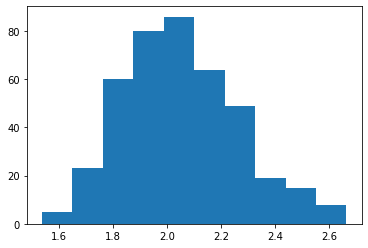

In [45]:
### BEGIN SOLUTION

hb_dists = [pose.residue(hb.don_res()).xyz(hb.don_hatm()).distance(
            pose.residue(hb.acc_res()).xyz(hb.acc_atm()))
            for hb in [ pose.get_hbonds().hbond(i) for i in range(1,pose.get_hbonds().nhbonds()+1) ]]
import matplotlib.pyplot as plt
plt.hist(hb_dists)
plt.show()

### END SOLUTION


2. Check all $N$-$C_\alpha$-$C$ bond angles in the protein to make sure they are reasonable.

(Not all residues have an $N$, $C_\alpha$, and $C$ atoms. You can ask a `Residue` if it has an atom, by name, with the `has` method)

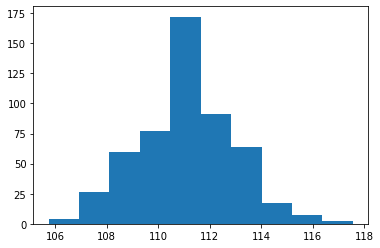

In [46]:
### BEGIN SOLUTION

def res_tau_angle(res):
    N_xyz = res.xyz("N")
    CA_xyz = res.xyz("CA")
    C_xyz = res.xyz("C")

    N_CA = N_xyz - CA_xyz
    C_CA = C_xyz - CA_xyz
    norm_N_CA = N_CA.length()
    norm_C_CA = C_CA.length()
    return math.acos((N_CA.dot(C_CA))/(norm_N_CA*norm_C_CA)) * 180 / math.pi

tau_angles = [res_tau_angle(pose.residue(i)) for i in range(1,pose.total_residue()+1) if pose.residue(i).has("N") and pose.residue(i).has("CA") and pose.residue(i).has("C") ]

plt.hist(tau_angles)
plt.show()

### END SOLUTION

3. Plot the Ramachandran plot for the protein to check that it makes sense. Are any phi/psi where they shouldn't be?

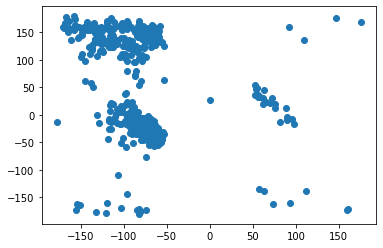

In [47]:
### BEGIN SOLUTION

phi = [pose.phi(i) for i in range(1,pose.total_residue() + 1) if pose.residue(i).is_protein()]
psi = [pose.psi(i) for i in range(1,pose.total_residue() + 1) if pose.residue(i).is_protein()]
plt.scatter(phi,psi)

### END SOLUTION

### Analyzing Amino Acid Patterns

1. Using PyMOL, find all the polar amino acids in the protein. Do you see a pattern here?

2. For each side chain, find its closest side-chain neighbor in 3D space. Plot a histogram of these distances. Which amino acids have side chains that are the furthest from another side chain? Where are they located in the protein?

Note: in `Residue`, each atom is either a backbone atom or it is a side-chain atom.

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


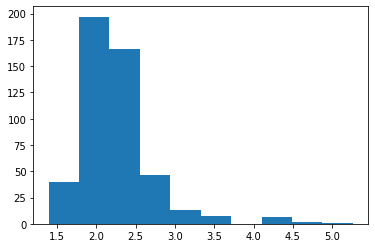

In [48]:
### BEGIN SOLUTION

nearest_dist2 = []
for i in range(1,pose.total_residue()+1):
    #print(i)
    ires = pose.residue(i)
    if not ires.is_protein():
        continue
    idist2_min = -1
    for j in range(1,pose.total_residue()+1):
        if i == j:
            continue
        jres = pose.residue(j)
        if not jres.is_protein():
            continue
        for k in range(1,ires.natoms()+1):
            if ires.atom_is_backbone(k):
                continue
            for l in range(1,jres.natoms()+1):
                if jres.atom_is_backbone(l):
                    continue
                d2 = ires.xyz(k).distance_squared(jres.xyz(l))
                if idist2_min < 0 or idist2_min > d2:
                    idist2_min = d2
    #print("i dists", i, [math.sqrt(d2) for d2 in idists2])
    #if len(idists2) == 0:
    #    continue
    if idist2_min < 0:
        continue
    nearest_dist2.append((i, ires.name(), idist2_min))
nearest_dists = [math.sqrt(d2) for i, _, d2 in nearest_dist2]
plt.hist(nearest_dists)
plt.show()

### END SOLUTION

In [49]:
### BEGIN SOLUTION
print([pose.pdb_info().pose2pdb(i) for i,_,d2 in nearest_dist2 if d2 > 30*30])
### END SOLUTION

[]


AA: ASN:NtermProteinFull


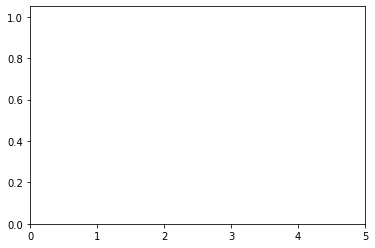

AA: ALA


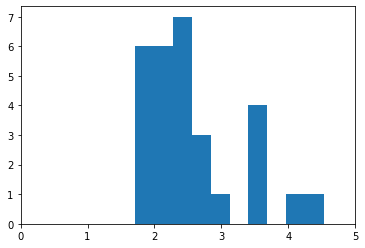

AA: VAL


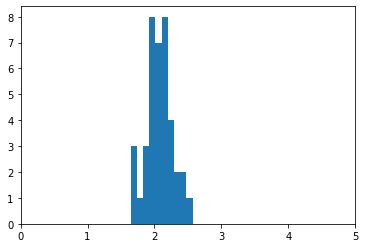

AA: PRO


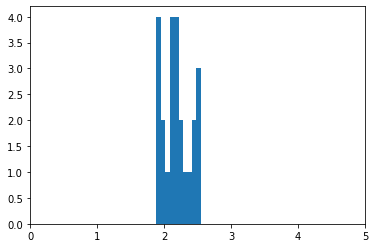

AA: ARG


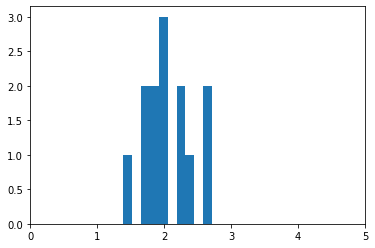

AA: LYS


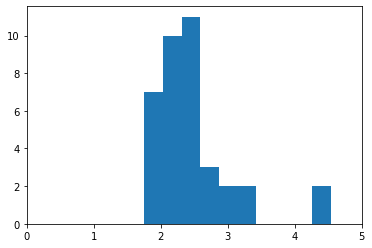

AA: LEU


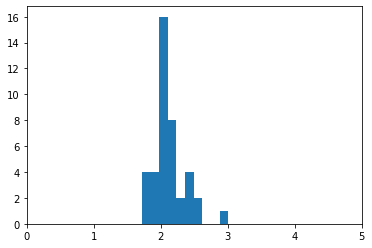

AA: ASP


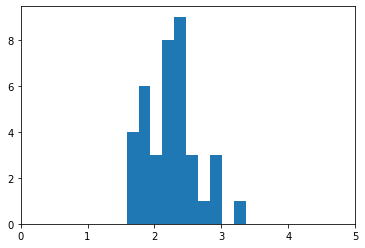

AA: GLN


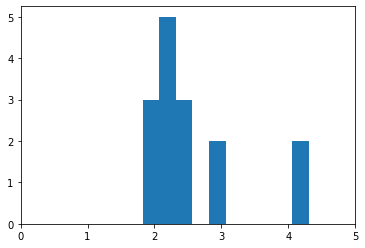

AA: MET


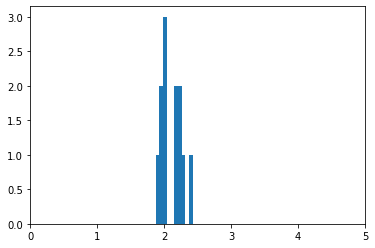

AA: TRP


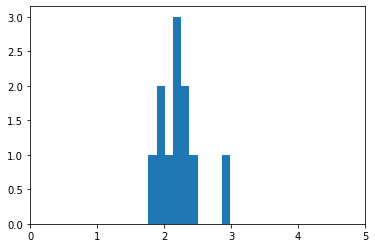

AA: TYR


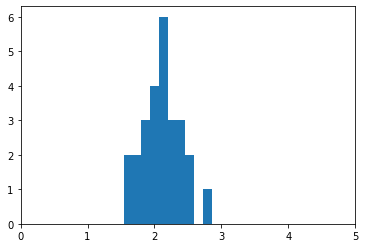

AA: SER


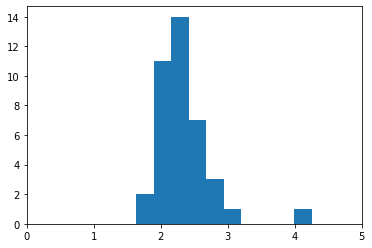

AA: GLU


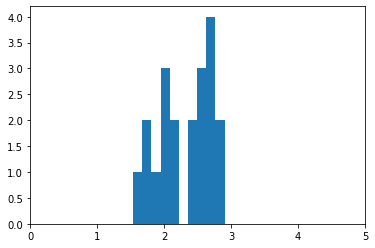

AA: PHE


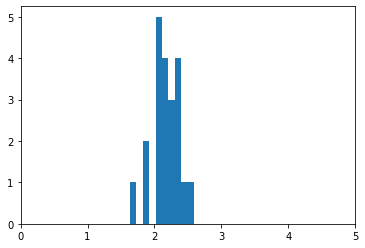

AA: ASN


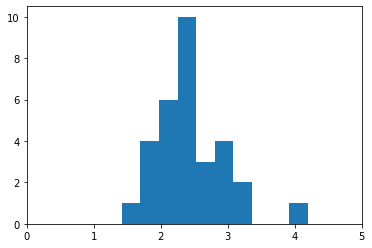

AA: THR


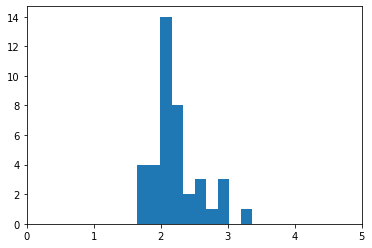

AA: HIS


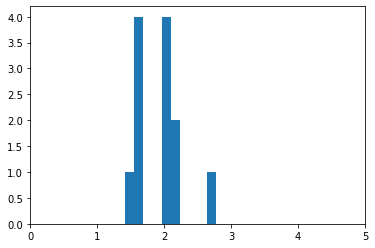

AA: ILE


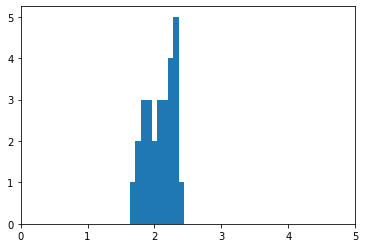

AA: THR:phosphorylated


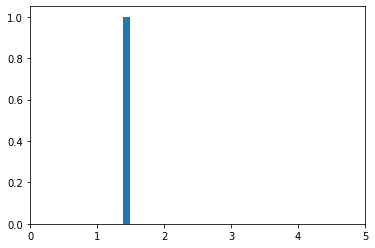

AA: CYS


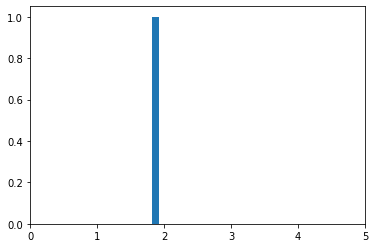

In [50]:
### BEGIN SOLUTION
from collections import defaultdict

near_by_aa = defaultdict(list)
for i, t, d2 in nearest_dist2:
    near_by_aa[t].append(math.sqrt(d2))

for t, dists in near_by_aa.items():
    print("AA:", t)
    plt.hist(dists)
    plt.gca().set_xlim(0,5)
    plt.show()
    
### END SOLUTION

## Manipulating Protein Geometry

We can also easily alter protein geometry using the Pose object. First, let's make a copy of the Pose object we loaded in initially so that we don't mess it up.

In [51]:
pose_change = Pose()
pose_change.assign(pose)
# pose.clone() or new_pose = Pose(pose) also work

Let's check that it looks the same.

In [52]:
pose_change.sequence()

'NAVPRPKLVVGLVVDQMRWDYLYRYYSKYGEGGFKRMLNTGYSLNNVHIDYVPTVTAIGHTSIFTGSVPSIHGIAGNDWYDKELGKSVYCTSDETVQPVGTTSNSVGQHSPRNLWSTTVTDQLGLATNFTSKVVGVSLKDRASILPAGHNPTGAFWFDDTTGKFITSTYYTKELPKWVNDFNNKNVPAQLVANGWNTLLPINQYTESSEDNVEWEGLLGSKKTPTFPYTDLAKDYEAKKGLIRTTPFGNTLTLQMADAAIDGNQMGVDDITDFLTVNLASTDYVGHNFGPNSIEVEDTYLRLDRDLADFFNNLDKKVGKGNYLVFLSADHGAAHSVGFMQAHKMPTGFFDMKKEMNAKLKQKFGADNIIAAAMNYQVYFDRKVLADSKLELDDVRDYVMTELKKEPSVLYVLSTDEIWESSIPEPIKSRVINGYNWKRSGDIQIISKDGYLSAYSKKGTTHSVWNSYDSHIPLLFMGWGIKQGESNQPYHMTDIAPTVSSLLKIQFPSGAVGKPITEVIGZZZZ'

**Note**: It would not be correct above to just write `pose_change = pose`. That would make a new pointer to the same instance of `Pose`, and changing `pose_change` would also change `pose`. Variables in Python are all pointers except for "primatives": ints, floats, etc. `Pose::assign` is a function you will use a lot this week.

In [53]:
resid = pose_change.pdb_info().pdb2pose('A', 28)
res_28 = pose_change.residue(resid)
N28 = AtomID(res_28.atom_index("N"), resid)
CA28 = AtomID(res_28.atom_index("CA"), resid)
C28 = AtomID(res_28.atom_index("C"), resid)

In [54]:
print(pose_change.conformation().bond_length(N28, CA28))

1.456100614655453


In [55]:
pose_change.conformation().set_bond_length(N28, CA28, 1.5)

In [56]:
print(pose_change.conformation().bond_length(N28, CA28))

1.5


Again not all arbitrary bond lengths, angles, and torsions are available in the `Conformation` object. You can also set xyz coordinates for pose residues directly. 

Changing torsion angles for residues is also easy:

In [57]:
pose_change.set_phi(resid, -60)
pose_change.set_psi(resid, -43)

To understand what these changes are doing, we are going to briefly look at the **fold tree** for PafA.

In [58]:
print(pose_change.fold_tree())
fold_tree = pose_change.fold_tree()

FOLD_TREE  EDGE 1 520 -1  EDGE 1 521 1  EDGE 1 522 2  EDGE 1 523 3  EDGE 1 524 4 


This looks a bit cryptic. The -1 edges indicate continuous stretches of bonded residues, and the numbered edges (here 1, 2, 3, 4) indicate non-bonded jumps from one residue to another. In this case, what are identities of residues 521, 522, 523, and 524? Why are these jump residues?

In [59]:
for i in (521, 522, 523, 524):
    print("res", i, pose_change.residue(i).name())
    

res 521 ZN
res 522 ZN
res 523 ZN
res 524 ZN


We can see that the whole protein is in a single chain from residue 1 to 520. The fold tree controls how changes to residue geometry propagate through the protein (left to right in the fold tree chain.) Based on the fold tree setup above, if you changed a torsion angle for residue 5, would the Cartesian coordinaes for residue 7 change? What about the coordinates for residue 3?

Lets test it out.

In [60]:
print(pose_change.residue(3).xyz("CA"))
print(pose_change.residue(7).xyz("CA"))

      20.27700000000000      -19.64300000000000       53.38600000000000
      11.14907956191098      -17.85994267886465       52.86201473975477


In [61]:
pose_change.set_phi(resid, -30)

In [62]:
print(pose_change.residue(3).xyz("CA"))
print(pose_change.residue(7).xyz("CA"))

      20.27700000000000      -19.64300000000000       53.38600000000000
      13.61648406895901      -17.09989314303723       50.68110766078932


In a later lecture, we will learn more about the FoldTree and we will see how and why you might change a FoldTree.

## PyMOL Mover

For the next step, you're going to need to locate the PyMOLRosettaServer.py file in your pyrosetta installation. It probably lives here:

`/Users/andrew/anaconda3/envs/pyrosetta_env/lib/python3.7/site-packages/pyrosetta/PyMOLRosettaServer.py`

except that instead of `/Users/andrew` it will be wherever your home directory is.


(Or download the `PyMOLPyRosettaServer.py` script from the google drive to some reasonable location on your computer, *e.g.* `/Users/andrew/rosetta/pymol_setup/`).

Add the following line to the file `.pymolrc` in your home directory (or create it if it doesn't exist yet): 

`run /Users/andrew/anaconda3/envs/pyrosetta_env/lib/python3.7/site-packages/pyrosetta/PyMOLRosettaServer.py`

except with the `/Users/andrew` part replaced with your home directory

(or with the directory wherever you stored that file if you downloaded it from the google drive)



To check that these commands are run by PyMOL, open up PyMOL and check for a message like `PyMOL <--> PyRosetta link started!` in the dialog box. PyMOL is now listening for updates from PyRosetta on port 127.0.0.1 by default.

The `PyMOLMover` class will let us send information from PyRosetta to PyMOL for quick visualization. First we're going to make an instance of PyMOLMover.

In [73]:
from pyrosetta import PyMOLMover
pmm = PyMOLMover()

To view the pose, you can use the apply method on your pose.

In [74]:
pmm.apply(pose)

The PyMOLMover has useful helper functions. For example, you can visualize all the hydrogen bonds in your protein with the following:

In [75]:
pmm.send_hbonds(pose)

Just deselect the hydrogen bonds in PyMOL if you want to hide them temporarily. You can also color the pose based on energies of each residue **after** scoring the pose.

In [76]:
sf = get_fa_scorefxn()
sf(pose)

core.scoring.ScoreFunctionFactory: {0} SCOREFUNCTION: ref2015


-538.7690318782074

In [77]:
pmm.send_energy(pose)

The structure colored from blue (low / favorable energy) to red (high / unfavorable energy). You can also color based on a specific energy term, for instsance the solvation energy below.

In [78]:
pmm.send_energy(pose, "fa_sol")

Which buried residues have high solvation energies?

Instead of calling `send_energy` every time, if you activate `update_energy`, the coloring will be updated every time you call the PyMOLMover's `apply` method.

In [79]:
pmm.update_energy(True) 
pmm.apply(pose)

The method `keep_history`, if set to True, allows you to load in structures with the same name into states of the same object in PyMOL. This is the starting point for creating a PyMOL movie of your structure, and allows you to loop through structures in different geometries efficiently.

In [80]:
pmm.keep_history(True) 
pmm.apply(pose_change)
pose_change.set_phi(5, -90)
pmm.apply(pose_change)

## Exercises

1. View PafA using the PyMOL mover apply function. Color the structure by VDW score (use fa_rep as your score term). Set the torsion angle of residue 28 to make some clashes. View the structure colored by VDW score again.

In [81]:
### BEGIN SOLUTION

pmm.send_energy(pose, "fa_rep")
pmm.keep_history(False)
pose_change.assign(pose)
print("phi 28", pose_change.phi(28))
pose_change.set_phi(28, 180)
pmm.apply(pose_change)

### END SOLUTION

phi 28 -104.80654298373821


2. Make an ideal helix consisting of 12 A residues by setting torsion angles. View the structure in PyMOL using the PyMOL mover. Bonus: Make a PyMOL movie that shows the Pose shifting from its starting configuration to its final ideal helix step by step, with one residue changing its torsion angles at a time.

In [82]:
### BEGIN SOLUTION

helix = pose_from_sequence("A"*12)
pmm.apply(helix)
pmm.keep_history(True)
for i in range(1,helix.total_residue()+1):
    helix.set_phi(i,-64)
    helix.set_psi(i,-41)
    pmm.apply(helix)

### END SOLUTION

## References
This notebook includes some concepts and exercises from:

"Workshop #2: PyRosetta" in the PyRosetta workbook: https://graylab.jhu.edu/pyrosetta/downloads/documentation/pyrosetta4_online_format/PyRosetta4_Workshop2_PyRosetta.pdf

"Workshop #4.1: PyMOL_Mover" in the PyRosetta workbook: 
http://www.pyrosetta.org/pymol_mover-tutorial